In [2]:
#Importing libraries required for this project
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold, cross_val_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [3]:
#Load data from csv file to a data frame
ship_fuel_df = pd.read_csv("ship_fuel_efficiency.csv")
#print out the first 5 rows and all the columns
ship_fuel_df.head()

,ship_id,ship_type,route_id,month,distance,fuel_type,fuel_consumption,CO2_emissions,weather_conditions,engine_efficiency
0,NG001,Oil Service Boat,Warri-Bonny,January,132.26,HFO,3779.77,10625.76,Stormy,92.14
1,NG001,Oil Service Boat,Port Harcourt-Lagos,February,128.52,HFO,4461.44,12779.73,Moderate,92.98
2,NG001,Oil Service Boat,Port Harcourt-Lagos,March,67.30,HFO,1867.73,5353.01,Calm,87.61
3,NG001,Oil Service Boat,Port Harcourt-Lagos,April,71.68,Diesel,2393.51,6506.52,Stormy,87.42
4,NG001,Oil Service Boat,Lagos-Apapa,May,134.32,HFO,4267.19,11617.03,Calm,85.61


In [4]:
#Check for Nulls
print(pd.isnull(ship_fuel_df).sum())

ship_id               0
ship_type             0
route_id              0
month                 0
distance              0
fuel_type             0
fuel_consumption      0
CO2_emissions         0
weather_conditions    0
engine_efficiency     0
dtype: int64


In [5]:
#Data Cleaning
#Dropping ship_id since this is not required for the data analysis of this project
ship_fuel_df = ship_fuel_df.drop(columns=['ship_id'])
ship_fuel_df.head()

,ship_type,route_id,month,distance,fuel_type,fuel_consumption,CO2_emissions,weather_conditions,engine_efficiency
0,Oil Service Boat,Warri-Bonny,January,132.26,HFO,3779.77,10625.76,Stormy,92.14
1,Oil Service Boat,Port Harcourt-Lagos,February,128.52,HFO,4461.44,12779.73,Moderate,92.98
2,Oil Service Boat,Port Harcourt-Lagos,March,67.30,HFO,1867.73,5353.01,Calm,87.61
3,Oil Service Boat,Port Harcourt-Lagos,April,71.68,Diesel,2393.51,6506.52,Stormy,87.42
4,Oil Service Boat,Lagos-Apapa,May,134.32,HFO,4267.19,11617.03,Calm,85.61


In [6]:
#Split the inputs and output
X = ship_fuel_df.drop('CO2_emissions', axis=1)
y = ship_fuel_df['CO2_emissions']

#List of categorical columns
catcolumn = ['ship_type','route_id', 'month', 'fuel_type', 'weather_conditions']
categorical_columns = X.select_dtypes(include=['object']).columns.tolist()
encoder = OneHotEncoder(sparse_output=False)

one_hot_encoded = encoder.fit_transform(X[catcolumn])

one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(catcolumn))

df_encoded = pd.concat([X, one_hot_df], axis=1)

df_encoded = df_encoded.drop(categorical_columns, axis=1)

df_encoded.to_csv('encoded_dataframe.csv', index=False)

In [7]:
df_encoded.head()

,distance,fuel_consumption,engine_efficiency,ship_type_Fishing Trawler,ship_type_Oil Service Boat,ship_type_Surfer Boat,ship_type_Tanker Ship,route_id_Escravos-Lagos,route_id_Lagos-Apapa,route_id_Port Harcourt-Lagos,...,month_March,month_May,month_November,month_October,month_September,fuel_type_Diesel,fuel_type_HFO,weather_conditions_Calm,weather_conditions_Moderate,weather_conditions_Stormy
0,132.26,3779.77,92.14,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,128.52,4461.44,92.98,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,67.30,1867.73,87.61,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,71.68,2393.51,87.42,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,134.32,4267.19,85.61,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [8]:
#Split the data into train and test set (7:3)
X_train, X_test, y_train, y_test = train_test_split(df_encoded, y, test_size=0.2, random_state=42)
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)

Shape of X_train:  (1152, 28)
Shape of X_test:  (288, 28)


In [9]:
#Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
#Linear Regression
LinearModel = LinearRegression()
LinearModel.fit(X_train, y_train)
y_pred = LinearModel.predict(X_test)

#Calculation of R^2, MSE, MAE
Lr2 = r2_score(y_test, y_pred)
Lmse = mean_squared_error(y_test, y_pred)
Lmae = mean_absolute_error(y_test, y_pred)

print(f"R²: {Lr2}, mse: {Lmse}, mae: {Lmae}")

R²: 0.9949733568275332, mse: 1043894.1939721158, mae: 633.9750202880542


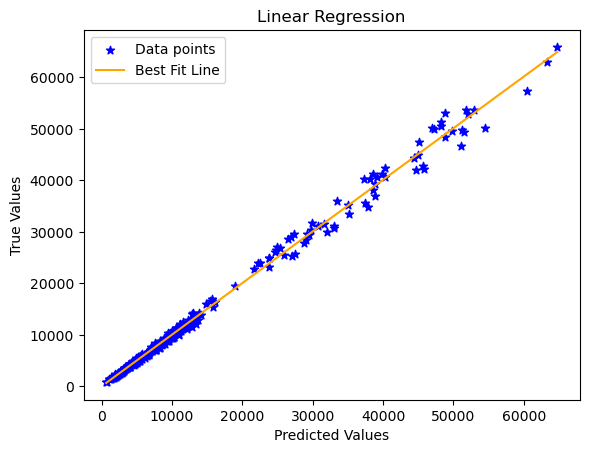

In [11]:
# Example scatter plot using predicted and actual values
plt.scatter(y_pred, y_test, marker='*', color='blue', label='Data points')

# Compute the best fit line parameters (slope and intercept)
slope, intercept = np.polyfit(y_pred, y_test, 1)

# Create x values for plotting the line. Here, we create 100 equally spaced values between the min and max of y_pred.
x_line = np.linspace(np.min(y_pred), np.max(y_pred), 100)
y_line = slope * x_line + intercept

# Plot the best fit line
plt.plot(x_line, y_line, color='orange', label='Best Fit Line')

# Add labels, legend, and show the plot
plt.title("Linear Regression")
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.legend()
plt.show()

In [12]:
#Generatng alpha from 0 to 10 in steps of 0.001
alpha = np.arange(0,10.001,0.001)
alpha = alpha.tolist()
results = {}
#for loop to test out all the alpha values to find the best value
for a in alpha:
    #Ridge Regression
    RidgeModel = Ridge(alpha=a)
    RidgeModel.fit(X_train, y_train)
    y_pred = RidgeModel.predict(X_test)

    #Calculation of R^2, MSE, MAE
    Rr2 = r2_score(y_test, y_pred)
    Rmse = mean_squared_error(y_test, y_pred)
    Rmae = mean_absolute_error(y_test, y_pred)

    results[a] = {'R²': Rr2, 'MSE': Rmse, 'MAE': Rmae}

#Output the best performing alpha and its performance matrics 
best_alpha_val = max(results, key=lambda a: results[a]['R²'])
print("Best alpha: ", best_alpha_val)
print("Performance for best alpha: ", results[best_alpha_val])

Best alpha:  0.001
Performance for best alpha:  {'R²': 0.9949762298570884, 'MSE': 1043297.5455192839, 'MAE': 633.7118401829564}


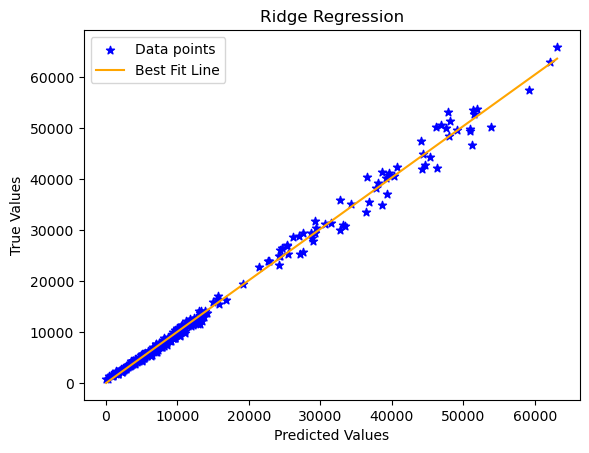

In [13]:
# Example scatter plot using predicted and actual values
plt.scatter(y_pred, y_test, marker='*', color='blue', label='Data points')

# Compute the best fit line parameters (slope and intercept)
slope, intercept = np.polyfit(y_pred, y_test, 1)

# Create x values for plotting the line. Here, we create 100 equally spaced values between the min and max of y_pred.
x_line = np.linspace(np.min(y_pred), np.max(y_pred), 100)
y_line = slope * x_line + intercept

# Plot the best fit line
plt.plot(x_line, y_line, color='orange', label='Best Fit Line')

# Add labels, legend, and show the plot
plt.title("Ridge Regression")
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.legend()
plt.show()

In [14]:
kf = KFold(n_splits=10, shuffle=True, random_state=42) #Split the dataset into 5

# Using cross_val_score with r² as the metric
lr_scores = cross_val_score(LinearModel, df_encoded, y, cv=kf, scoring='r2')
print("Linear Regression CV R² scores:", lr_scores)
print("Mean CV R² (Linear Regression):", lr_scores.mean())

#Ridge Regression Evaluation
ridge_alpha = 0.001
RidgeModel = Ridge(alpha=ridge_alpha)
ridge_scores = cross_val_score(RidgeModel, df_encoded, y, cv=kf, scoring='r2')
print(f"Ridge Regression (alpha={ridge_alpha}) CV R² scores:", ridge_scores)
print(f"Mean CV R² (Ridge Regression):", ridge_scores.mean())

Linear Regression CV R² scores: [0.99400899 0.99600528 0.99489961 0.99424266 0.99541399 0.99334835
 0.99343844 0.99553045 0.99376503 0.99249532]
Mean CV R² (Linear Regression): 0.9943148123097203
Ridge Regression (alpha=0.001) CV R² scores: [0.99400899 0.99600528 0.99489961 0.99424266 0.99541399 0.99334835
 0.99343845 0.99553045 0.99376503 0.99249533]
Mean CV R² (Ridge Regression): 0.9943148133659239


In [15]:
# Additional check for multicollinearity: VIF (Variance Inflation Factor)
X_with_const = add_constant(X_train)  # Add constant for intercept
feature_columns_with_const = ['const'] + list(df_encoded.columns)  # Include constant in feature names

# Compute the VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = feature_columns_with_const
vif_data["VIF"] = [variance_inflation_factor(X_with_const, i) for i in range(X_with_const.shape[1])]

# Display the VIFs
print("\nVariance Inflation Factors (VIF):")
print(vif_data)


Variance Inflation Factors (VIF):
                         feature        VIF
0                          const   1.000000
1                       distance  13.199756
2               fuel_consumption  17.418582
3              engine_efficiency   1.017493
4      ship_type_Fishing Trawler        inf
5     ship_type_Oil Service Boat        inf
6          ship_type_Surfer Boat        inf
7          ship_type_Tanker Ship        inf
8        route_id_Escravos-Lagos        inf
9           route_id_Lagos-Apapa        inf
10  route_id_Port Harcourt-Lagos        inf
11          route_id_Warri-Bonny        inf
12                   month_April        inf
13                  month_August        inf
14                month_December        inf
15                month_February        inf
16                 month_January        inf
17                    month_July        inf
18                    month_June        inf
19                   month_March        inf
20                     month_May        i

c:\Users\misak\anaconda3\envs\DL_env\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)



Correlation Matrix:
                              distance  fuel_consumption  engine_efficiency  \
distance                      1.000000          0.945100          -0.026146   
fuel_consumption              0.945100          1.000000          -0.031269   
engine_efficiency            -0.026146         -0.031269           1.000000   
ship_type_Fishing Trawler    -0.114062         -0.169408          -0.031874   
ship_type_Oil Service Boat   -0.377838         -0.286033           0.073514   
ship_type_Surfer Boat        -0.200988         -0.350141          -0.010411   
ship_type_Tanker Ship         0.666889          0.763184          -0.035139   
route_id_Escravos-Lagos       0.008006          0.010588          -0.007047   
route_id_Lagos-Apapa          0.039806          0.040644           0.008541   
route_id_Port Harcourt-Lagos -0.005237         -0.004865          -0.005975   
route_id_Warri-Bonny         -0.046715         -0.050844           0.004813   
month_April                   0

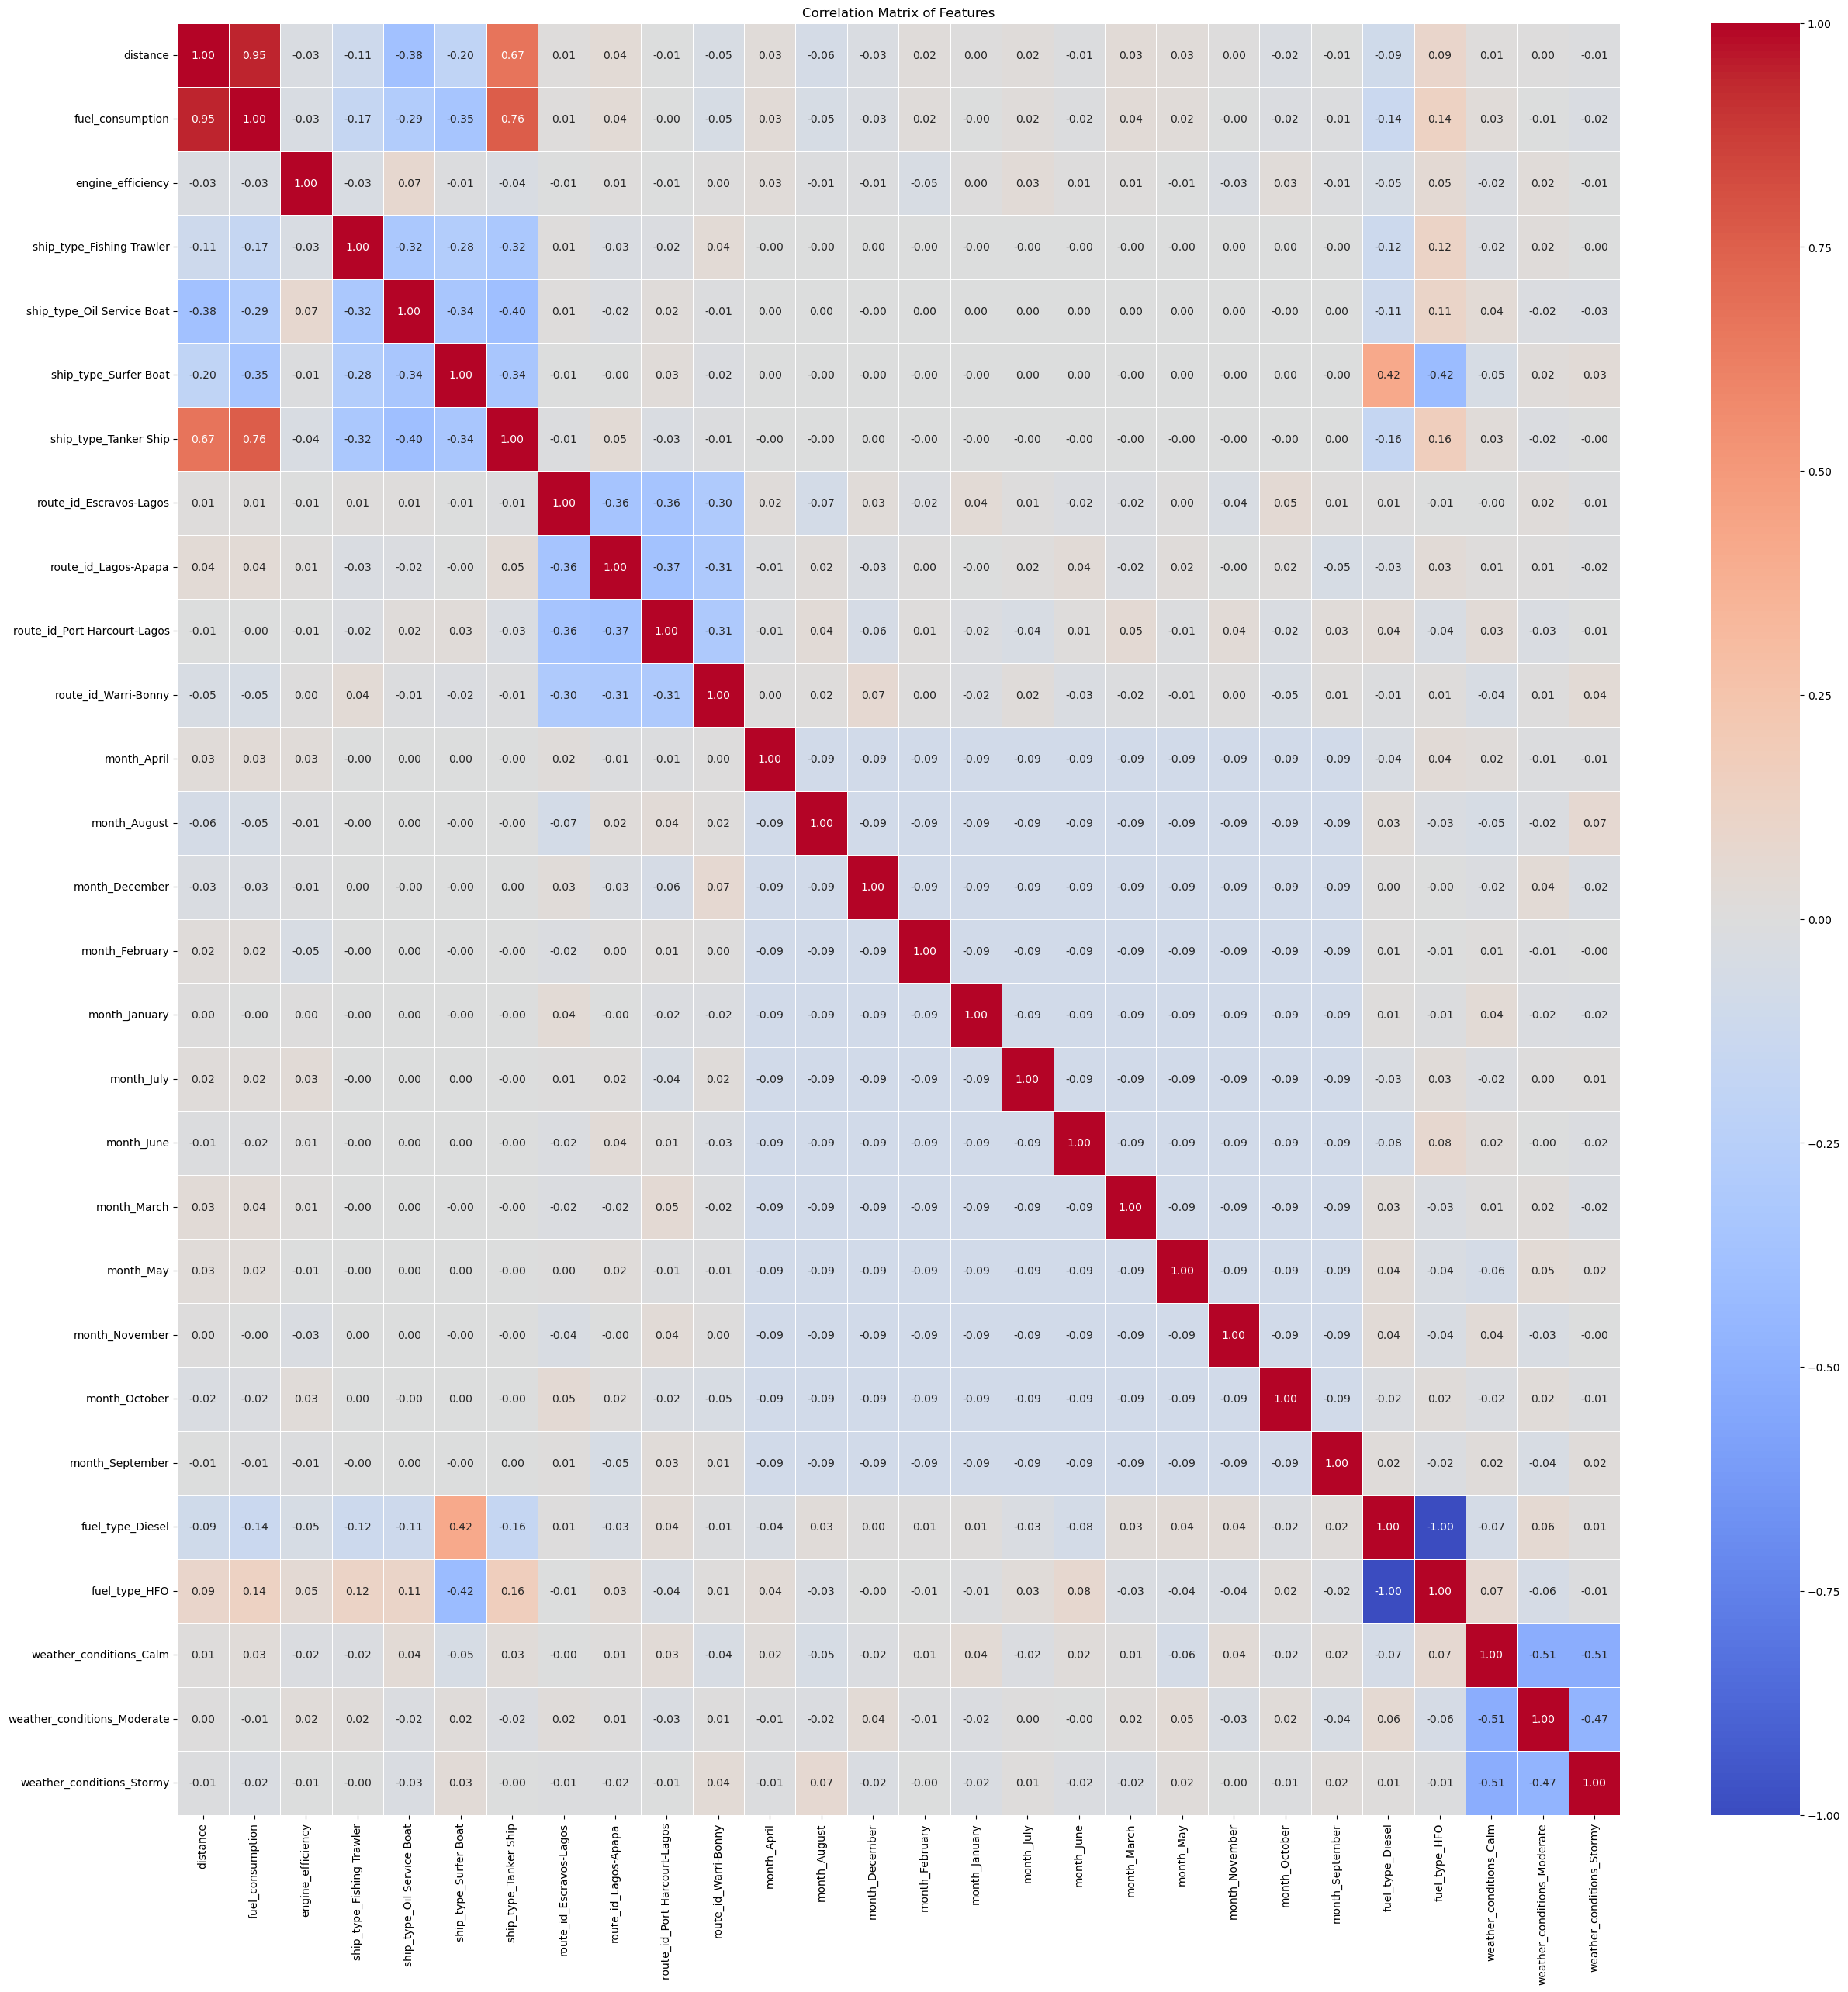


Highly Correlated Feature Pairs (correlation > 0.8):
fuel_consumption and distance: 0.95
fuel_type_HFO and fuel_type_Diesel: -1.00


In [18]:
# Calculate the correlation matrix for the features
correlation_matrix = df_encoded.corr()

# Display the correlation matrix
print("\nCorrelation Matrix:")
print(correlation_matrix)

# Plot a heatmap of the correlation matrix for better visualization
plt.figure(figsize=(30, 30))
sb.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Features')
plt.show()

# Identify pairs of features with high correlation (absolute value > 0.8)
high_correlation_pairs = []
for i in range(correlation_matrix.shape[0]):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            high_correlation_pairs.append((correlation_matrix.columns[i], correlation_matrix.columns[j], correlation_matrix.iloc[i, j]))

# Display highly correlated feature pairs
print("\nHighly Correlated Feature Pairs (correlation > 0.8):")
for pair in high_correlation_pairs:
    print(f"{pair[0]} and {pair[1]}: {pair[2]:.2f}")